In [3]:
import glob
import os
import pandas as pd

In [4]:
ls data

NEH_Evaluators.csv     NEH_Grants1980s.csv    NEH_StateCouncils.csv
NEH_Grants.csv         NEH_Grants1990s.csv    gc.csv
NEH_Grants1960s.csv    NEH_Grants2000s.csv
NEH_Grants1970s.csv    NEH_Grants2010s.csv


In [5]:
big_frame = pd.read_csv('data/NEH_Grants.csv')

In [6]:
big_frame.keys()

Index(['Unnamed: 0', 'AppNumber', 'ApplicantType', 'ApprovedMatching',
       'ApprovedOutright', 'AwardMatching', 'AwardOutright', 'BeginGrant',
       'CouncilDate', 'Discipline', 'DisciplineCount', 'Division', 'EndGrant',
       'InstCity', 'InstCountry', 'InstPostalCode', 'InstState', 'Institution',
       'OrganizationType', 'OriginalAmount', 'Participant', 'ParticipantCount',
       'PrimaryDiscipline', 'Program', 'ProjectDesc', 'ProjectTitle',
       'Supplement', 'SupplementAmount', 'SupplementCount', 'ToSupport',
       'Unnamed: 0.1', 'YearAwarded'],
      dtype='object')

In [7]:
%matplotlib inline
big_frame[['Institution', 'ProjectTitle', 
           'YearAwarded','Program','AwardOutright','AwardMatching']].sort(columns=['AwardOutright'])


/Users/hannah/anaconda/envs/neh/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,Institution,ProjectTitle,YearAwarded,Program,AwardOutright,AwardMatching
28244,Princeton University Press,Purchase of Penta Tele/Media Interface for Tra...,1984,Scholarly Publications,-1041.77,11748.00
27061,University of Virginia,The Papers of George Washington,1981,Editions,-69.92,135000.00
27851,Unaffiliated Independent Scholar,Ancient Maya Writing,1984,Basic Research,-40.03,16070.00
31649,Pennsylvania State University - Brandywine,"New Lives, New Worlds: Utopian Novels by Women...",1988,"Travel to Collections, 11/85 - 2/95",0.00,0.00
15179,Massachusetts Institute of Technology,"Faith, Science, and the Future",1979,Special Projects,0.00,75000.00
40014,Harvard Semitic Museum,Publication of the Wadi Daliyeh Seal Impressions,1991,"Travel to Collections, 11/85 - 2/95",0.00,0.00
49095,Northwestern University,"An Excavation in the Theater of Pompey, Rome",2002,Collaborative Research,0.00,25000.00
49102,Alabama State University,Center for the Study of Civil Rights and Afric...,2000,Challenge Grants,0.00,500000.00
49103,American Antiquarian Society,Building Endowment for Acquisitions.,2000,Challenge Grants,0.00,450000.00
49104,American Council of Learned Societies,Endowment Campaign for ACLS Fellowship Program.,2000,Challenge Grants,0.00,500000.00


In [8]:
CUNY = big_frame[big_frame['Institution'].str.contains("CUNY Research Foundation, Graduate School and University Center")]

In [23]:
CUNY.keys()

Index(['Unnamed: 0', 'AppNumber', 'ApplicantType', 'ApprovedMatching',
       'ApprovedOutright', 'AwardMatching', 'AwardOutright', 'BeginGrant',
       'CouncilDate', 'Discipline', 'DisciplineCount', 'Division', 'EndGrant',
       'InstCity', 'InstCountry', 'InstPostalCode', 'InstState', 'Institution',
       'OrganizationType', 'OriginalAmount', 'Participant', 'ParticipantCount',
       'PrimaryDiscipline', 'Program', 'ProjectDesc', 'ProjectTitle',
       'Supplement', 'SupplementAmount', 'SupplementCount', 'ToSupport',
       'Unnamed: 0.1', 'YearAwarded'],
      dtype='object')

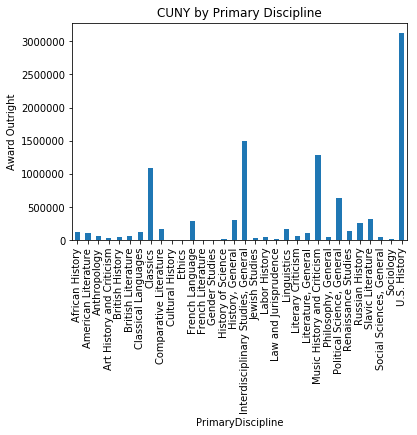

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
CUNY.groupby('PrimaryDiscipline')['AwardOutright'].sum().plot("bar", ax=ax)
ax.set_title("CUNY by Primary Discipline")
ax.set_ylabel("Award Outright")

In [26]:
tab = CUNY.groupby(['BeginGrant', 'PrimaryDiscipline'])['AwardOutright'].sum().unstack()

In [27]:
tab.values

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])

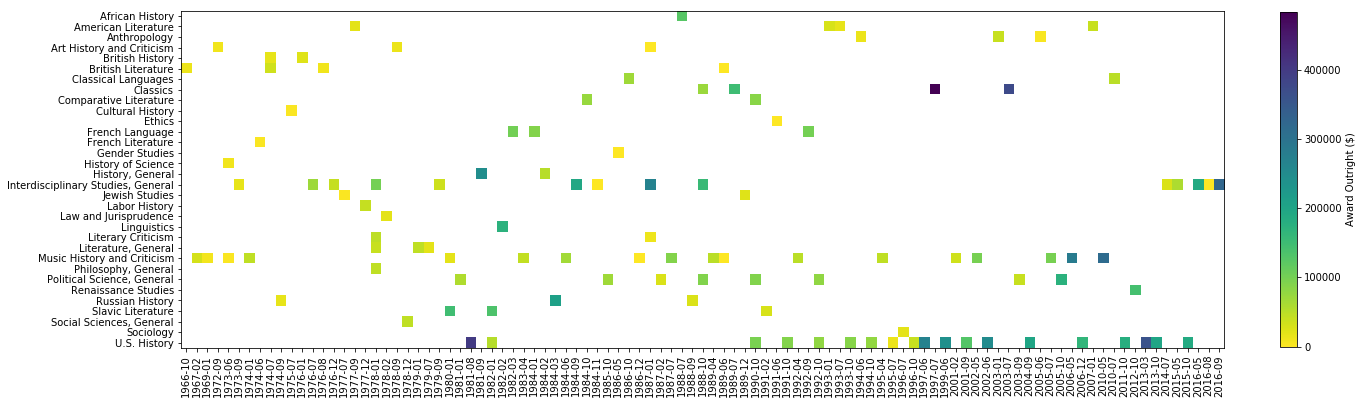

In [29]:
import matplotlib.cm as mcm

fig, ax = plt.subplots(figsize=(20,10))
clean_time = pd.to_datetime(tab.index.values,infer_datetime_format=True).strftime("%Y-%m")
sm = ax.imshow(tab.values.T, cmap=mcm.viridis_r)
ax.set_xticks(range(tab.index.values.shape[0]))
ax.set_xticklabels(clean_time, rotation=90)
ax.set_yticks(range(len(tab.keys())))
ax.set_yticklabels(tab.keys(),rotation=0)
cb = fig.colorbar(sm, ax=ax, fraction=.015)
cb.set_label("Award Outright ($)")

In [30]:
tab.keys()

Index(['African History', 'American Literature', 'Anthropology',
       'Art History and Criticism', 'British History', 'British Literature',
       'Classical Languages', 'Classics', 'Comparative Literature',
       'Cultural History', 'Ethics', 'French Language', 'French Literature',
       'Gender Studies', 'History of Science', 'History, General',
       'Interdisciplinary Studies, General', 'Jewish Studies', 'Labor History',
       'Law and Jurisprudence', 'Linguistics', 'Literary Criticism',
       'Literature, General', 'Music History and Criticism',
       'Philosophy, General', 'Political Science, General',
       'Renaissance Studies', 'Russian History', 'Slavic Literature',
       'Social Sciences, General', 'Sociology', 'U.S. History'],
      dtype='object', name='PrimaryDiscipline')